<!-- ## /OPENBLOK: Data-aanmaken.py -->
# Toepassing
Gebruik de *one sample t-toets* om het gemiddelde van de steekproef te vergelijken met een bekend gemiddelde of norm van de totale populatie.[^1] gemiddelde

# Tekst

# Onderwijscasus
<div id = "casus">
De opleidingsdirecteur van de opleiding Werktuigbouwkunde wil weten of het gemiddelde eindexamencijfer voor de exacte vakken (Wiskunde, Natuurkunde en Scheikunde; WNS) van vwo studenten anders is dan het landelijk gemiddelde (6,8).[^2] Met deze gegevens probeert zij een inschatting te maken van het niveau van de studenten en kan zij bepalen of het curriculum van de inleidende vakken genoeg aansluit bij eerstejaars studenten met een vwo vooropleiding.

Dit onderzoek vertaalt zich in de volgende combinatie van hypothesen, waarbij de nulhypothese zo geformuleerd is dat er geen effect of verschil is en de alternatieve hypothese zo geformuleerd is dat er wel een effect of verschil is.

*H~0~*: Het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die beginnen aan de Bachelor Werktuigbouwkunde is gelijk aan het landelijk gemiddelde: µ = 6,8. 

*H~A~*: Het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die beginnen aan de Bachelor Werktuigbouwkunde is anders dan het landelijk gemiddelde: µ ≠ 6,8. 
</div>

# Assumpties
Om een valide resultaat te bereiken moeten, voordat de toets kan worden uitgevoerd, de data aan een aantal voorwaarden voldoet. 

## Normaliteit 
De *one sample t-toets* gaat ervan uit dat de data van de steekproef normaal verdeeld is. Ga er bij meer dan 100 observaties vanuit dat de *one sample t-toets* robuust genoeg is om uit te voeren zonder dat de steekproef een normale verdeling volgt.[^3] 

Controleer de assumptie van normaliteit met de volgende stappen:  
1. Controleer de data visueel met een histogram, een boxplot of een Q-Q plot.   
2. Toets of de steekproef normaal verdeeld is met de *Kolmogorov-Smirnov test* of bij een kleinere steekproef (n < 50) met de *Shapiro-Wilk test*.[^4]<sup>, </sup>[^5]  

De eerste stap heeft als doel een goede indruk te krijgen van de verdeling van de steekproef. In de tweede stap wordt de assumptie van normaliteit getoetst. De statistische toets laat zien of de verdeling van de steekproef voldoet aan de assumptie van normaliteit.

Als blijkt dat de steekproef niet normaal verdeeld is en de steekproefgrootte te laag is voor een robuuste toets, transformeer dan de observaties en bepaal daarna of deze wel normaal verdeeld zijn.[^6] Een andere optie in dit geval is het gebruiken van de [Wilcoxon signed rank toets](07-Wilcoxon-signed-rank-toets-R.html).[^7]<sup>, </sup>[^8]

# Uitvoering
<!-- ## TEKSTBLOK: Dataset-inladen.py -->
Er is een dataset ingeladen met de gemiddelde eindexamencijfers van WNS van eerstejaars Werktuigbouwkunde: `dfGemiddeld_cijfer_WNS`.
<!-- ## /TEKSTBLOK: Dataset-inladen.py -->

## De data bekijken
<!-- ## TEKSTBLOK: Data-bekijken.py -->
Gebruik `<dataframe>.head()` en `<dataframe>.tail()` uit de library `pandas` om de structuur van de data te bekijken.
<!-- ## /TEKSTBLOK: Data-bekijken.py -->
<!-- ## OPENBLOK: Data-bekijken.py -->

In [1]:
# Pandas library importeren
import pandas as pd

In [2]:
dfGemiddeld_cijfer_WNS = pd.read_csv("data/01_Gemiddeld_cijfer_WNS.csv")['x']
Gemiddeld_cijfer_WNS = dfGemiddeld_cijfer_WNS.to_numpy()

In [3]:
# Eerste 5 observaties
print(dfGemiddeld_cijfer_WNS.head(5))

0    7.400000
1    7.366667
2    7.366667
3    7.666667
4    5.933333
Name: x, dtype: float64


In [4]:
# Laatste 5 observaties
print(dfGemiddeld_cijfer_WNS.tail())

119    6.133333
120    8.066667
121    5.166667
122    7.700000
123    6.366667
Name: x, dtype: float64


<!-- ## /OPENBLOK: Data-bekijken.py -->
<!-- ## TEKSTBLOK: Data-beschrijven.py-->
Gebruik de variabele `Gemiddeld_cijfer_WNS`. Inspecteer de dataset door de groepsgrootte, het gemiddelde en de standaardafwijking te bekijken met de functies `np.size()`, `np.mean()` en `np.sqrt(np.var(<variabele>, ddof = 1))`uit de library `numpy`.
<!-- ## /TEKSTBLOK: Data-beschrijven.py-->
<!-- ## OPENBLOK: Data-beschrijven.py -->

In [5]:
# Numpy Library importeren
import numpy as np

In [6]:
## Gemiddelde en standaarddeviatie
print(np.size(Gemiddeld_cijfer_WNS))
print(np.mean(Gemiddeld_cijfer_WNS))
print(np.std(Gemiddeld_cijfer_WNS))

124
7.128763440860216
0.7818658718289299


<!-- ## /OPENBLOK: Data-beschrijven.py -->
<!-- ## CLOSEDBLOK: Data-beschrijven.py -->

In [7]:
mean = np.mean(Gemiddeld_cijfer_WNS)
sd = np.std(Gemiddeld_cijfer_WNS)
N = np.size(Gemiddeld_cijfer_WNS)

<!-- ## /CLOSEDBLOK: Data-beschrijven.py -->
<!-- ## TEKSTBLOK: Data-beschrijven2.py -->
* Gemiddeld cijfer WNS (standaardafwijking): `r Round_and_format(py$mean)` (`r Round_and_format(py$sd)`). *n* = `r py$N`.
<!-- ## /TEKSTBLOK: Data-beschrijven2.py -->

## Visuele inspectie van normaliteit
Geef de verdeling van de steekproef visueel weer met een histogram, Q-Q plot en boxplot.

### Histogram

Focus bij het analyseren van een histogram[^18] op de symmetrie van de verdeling, de hoeveelheid toppen (modaliteit) en mogelijke uitbijters. Een normale verdeling is symmetrisch, heeft één top en geen uitbijters.[^9]<sup>, </sup>[^10]

<!-- ## OPENBLOK: Histogram.py -->

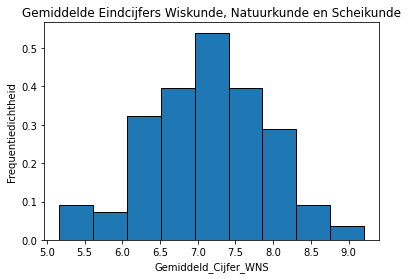

In [8]:
## Histogram met matplotlib
import matplotlib.pyplot as plt
hist = plt.hist(Gemiddeld_cijfer_WNS, density = True, edgecolor = "black", bins = 9)
title = plt.title("Gemiddelde Eindcijfers Wiskunde, Natuurkunde en Scheikunde")
xlab = plt.xlabel("Gemiddeld_Cijfer_WNS")
ylab = plt.ylabel("Frequentiedichtheid")
plt.show()

<!-- ## /OPENBLOK: Histogram.py -->

De histogram lijkt symmetrisch, heeft één top en geen outliers. De steekproef is dus bij benadering normaal verdeeld.

### Q-Q plot
<!-- ## TEKSTBLOK: QQplot.py-->
Importeer `scipy.stats` om een Q-Q plot te maken en statistische testen uit te voeren. Voor een Q-Q plot kan de functie `scipy.stats.probplot()` worden gebruikt.
<!-- ## /TEKSTBLOK: QQplot.py-->

Als over het algemeen de meeste datapunten op de lijn liggen, kan aangenomen worden dat de data normaal verdeeld is.
<!-- ## OPENBLOK: QQplot.py -->

In [9]:
import scipy.stats as stats

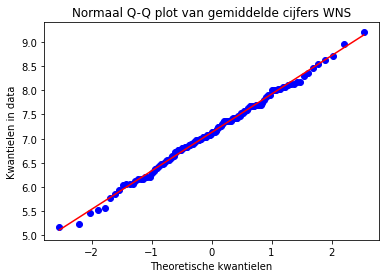

In [10]:
qq = stats.probplot(Gemiddeld_cijfer_WNS, dist="norm", plot=plt)
title = plt.title("Normaal Q-Q plot van gemiddelde cijfers WNS")
xlab = plt.xlabel("Theoretische kwantielen")
ylab = plt.ylabel("Kwantielen in data")
plt.show()

<!-- ## /OPENBLOK: QQplot.py -->

In deze casus liggen de meeste punten op de lijn. Bij de uiteinden liggen de punten dichtbij de lijn. Deze Q-Q plot duidt dus op een goede benadering van de normaalverdeling.

### Boxplot
De box geeft de middelste 50% van de tentamencijfers weer. De zwarte lijn binnen de box is de mediaan. In de staarten of snorreharen zitten de eerste 25% en de laatste 25%. Cirkels visualiseren mogelijke uitbijters.[^9] Hoe meer de boxen overlappen, hoe waarschijnlijker er geen significant verschil is tussen de groepen. 

<!-- ## OPENBLOK: Boxplot.py -->
``` {python boxplot}
## Boxplot
box = plt.boxplot(Gemiddeld_cijfer_WNS, labels = [""])
x = plt.xlabel("Werktuigbouwkunde")
y = plt.ylabel("Gemiddeld_cijfer_WNS")
plt.show()
```
<!-- ## /OPENBLOK: Boxplot.py -->

De boxplot geeft de spreiding van het gemiddelde eindexamencijfer voor de exacte vakken weer van de studenten Werktuigbouwkunde. De box en staarten zien er symmetrisch uit, wat een indicatie is van een normale verdeling.[^10]  

## Toetsen van normaliteit
Om te controleren of de steekproef aan de assumptie van normaliteit voldoet, kan de normaliteit getoetst worden. Twee veelgebruikte toetsen zijn: de *Kolmogorov-Smirnov test* en de *Shapiro-Wilk test*.

### Kolmogorov-Smirnov
De *Kolmogorov-Smirnov test* toetst het verschil tussen twee verdelingen. Standaard toetst deze test het verschil tussen een normale verdeling en de verdeling van de steekproef. De Lilliefors correctie is vereist als het gemiddelde en de standaardafwijking niet van tevoren bekend of bepaald zijn, wat meestal het geval is bij een steekproef. Als de p-waarde kleiner dan 0,05 is, is de verdeling van de steekproef significant verschillend van een normale verdeling.

<!-- ## TEKSTBLOK: Lilliefors-test1.py -->
De standaard interpretatie van een statistische toets in Python is als volgt: `(<teststatistiek>, <p-waarde>)`. Gebruik bij deze toets het argument `pvalmethod = "table"` om een betrouwbare p-waarde te krijgen.
<!-- ## /TEKSTBLOK: Lilliefors-test1.py -->

<!-- ## OPENBLOK: Lilliefors-test.py -->

In [11]:
## Kolmogorov-Smirnov test
import statsmodels.stats.api
print(statsmodels.stats.api.lilliefors(Gemiddeld_cijfer_WNS, pvalmethod = "table"))

(0.04110412174561617, 0.9101034629612762)


In [12]:
## Kolmogorov-Smirnov test
import statsmodels.stats.api
lillieforstest = statsmodels.stats.api.lilliefors(Gemiddeld_cijfer_WNS, pvalmethod = "table")

<!-- ## /OPENBLOK: Lilliefors-test.py -->

<!-- ## TEKSTBLOK: Lilliefors-test2.py -->
De p-waarde is `r Round_and_format(unlist(py$lillieforstest[2]))`, dus er is geen significant verschil gevonden tussen de verdeling van de steekproef en de normale verdeling. De *one sample-t-toets* kan uitgevoerd worden.
<!-- ## /TEKSTBLOK: Lilliefors-test2.py -->

### Shapiro-Wilk Test
De *Shapiro-Wilk test* is een soortgelijke test als de *Kolmogorov-Smirnov test* en vooral geschikt bij kleine steekproeven (n < 50). Als de p-waarde kleiner dan 0,05 is, is de verdeling van de steekproef significant verschillend van de normale verdeling.
<!-- ## TEKSTBLOK: Shapiro-Wilk-test.py -->

In [13]:
dfGemiddeld_cijfer_WNS_n30 = pd.read_csv("data/01_Gemiddeld_cijfer_WNS_n30.csv")['x']
Gemiddeld_cijfer_WNS_n30 = dfGemiddeld_cijfer_WNS_n30.to_numpy()
N30 = len(Gemiddeld_cijfer_WNS_n30)

Er is een subset van `Gemiddeld_cijfer_WNS` ingeladen: `Gemiddeld_cijfer_WNS_n30`. De steekproef bevat `r py$N30` studenten.
<!-- ## TEKSTBLOK: Shapiro-Wilk-test.py -->
<!-- ## OPENBLOK: Shapiro-Wilk-test.py -->
``` {python Shapiro-Wilk Test, warning=FALSE}
#Shapiro-Wilk test
print(stats.shapiro(Gemiddeld_cijfer_WNS_n30))
```
``` {python Shapiro-Wilk Test2, warning=FALSE, include = FALSE}
#Shapiro-Wilk test
swtest = stats.shapiro(Gemiddeld_cijfer_WNS_n30)
```
<!-- ## /OPENBLOK: Shapiro-Wilk-test.py -->

<!-- ## TEKSTBLOK: Shapiro-Wilk-test2.py -->
De p-waarde is `r Round_and_format(unlist(py$swtest[2]))`, dus er is geen significant verschil gevonden tussen de verdeling van de steekproef en de normale verdeling. De *one sample-t-toets* kan uitgevoerd worden.
<!-- ## /TEKSTBLOK: Shapiro-Wilk-test2.py -->

##  One sample t-toets
<!-- ## TEKSTBLOK: T-test.py -->
Gebruik `scipy.stats.ttest_1samp()` om een t-toets uit te voeren. Gebruik het argument `popmean = 6.8` om het gemiddelde te specificeren waarmee wordt vergeleken. De standaard in Python is dat er tweezijdig wordt getoetst. De verwachting is dat de studenten hoger scoren, maar omdat het relevant is om te weten of de studenten ook lager scoren dan het landelijk gemiddelde, is er voor gekozen om tweezijdig te toetsen. Een eenzijdige toets kan uitgevoerd worden door de p-waarde te verdubbelen en daarna te vergelijken met het significantieniveau. Gebruik de hele dataset `dfGemiddeld_cijfer_WNS` met *n* = `r py$N`. 
<!-- ## /TEKSTBLOK: T-test.py -->
<!-- ## OPENBLOK: T-test.py -->

In [14]:
## T-test
print(stats.ttest_1samp(Gemiddeld_cijfer_WNS, popmean = 6.8))

Ttest_1sampResult(statistic=4.663412324551201, pvalue=7.970241179899989e-06)


<!-- ## /OPENBLOK: T-test.py -->
<!-- ## CLOSEDBLOK: T-test.py -->

In [15]:
stat, pval = stats.ttest_1samp(Gemiddeld_cijfer_WNS, popmean = 6.8)
par = N - 1

<!-- ## /CLOSEDBLOK: T-test.py -->

<!-- ## TEKSTBLOK: betrouwbaarheidsintervaltekst.py -->
Bereken het 95%-betrouwbaarheidsinterval van het gemiddelde handmatig.
<!-- ## /TEKSTBLOK: betrouwbaarheidsintervaltekst.py -->

<!-- ## OPENBLOK: betrouwbaarheidsinterval.py -->

In [16]:
# Bereken het gemiddelde
Gemiddelde = np.mean(Gemiddeld_cijfer_WNS)
# Sla het aantal observaties op
N = np.size(Gemiddeld_cijfer_WNS)

# Bereken de standaardafwijking van de dataset
Standaardafwijking = np.sqrt(np.var(Gemiddeld_cijfer_WNS, ddof = 1))

# Bereken de t-waarde behorend bij het aantal vrijheidsgraden in deze toets
t = - stats.t.ppf(0.025, N - 1)

# Bereken het 95%-betrouwbaarheidsinterval
Ondergrens = Gemiddelde - t * Standaardafwijking / np.sqrt(N)
Bovengrens = Gemiddelde + t * Standaardafwijking / np.sqrt(N)
print(Ondergrens, Bovengrens)
from myst_nb import glue
glue("cool_text", Bovengrens)

6.989216039132854 7.268310842587578


<!-- ## /OPENBLOK: betrouwbaarheidsinterval.py -->

<!-- ## TEKSTBLOK: T-test2.py -->
* Vrijheidsgraden, *df* = *n* -1 = `r Round_and_format(py$N)`-1 = `r py$par`  
* *t* ~`r py$par`~ = `r Round_and_format(py$stat)`, *p* < 0,0001
* p-waarde < 0,05, dus de H~0~ wordt verworpen[^9]
* 95%-betrouwbaarheidsinterval: bij het herhalen van het experiment met verschillende steekproeven van de populatie zal 95% van de betrouwbaarheidsintervallen de daadwerkelijke parameter bevatten, het gemiddeld eindexamencijfer exacte vakken. In deze casus is het interval tussen `r Round_and_format(py$Ondergrens)` en `r Round_and_format(py$Bovengrens)`. Aangezien 6.8 niet in dit interval zit, verschilt het gemiddelde significant van 6.8.
* Het gemiddelde van de steekproef is `r Round_and_format(py$mean)`  
<!-- ## /TEKSTBLOK: T-test2.py -->

# Rapportage
<!-- ## TEKSTBLOK: Rapportage.py -->
De *one sample t-toets* is uitgevoerd om te toetsen of het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die Werktuigbouwkunde zijn gaan studeren anders is dan het landelijk gemiddelde. Het gemiddelde van de steekproef (*M* = `r Round_and_format(py$mean)`, *SD* = `r Round_and_format(py$sd)`) is statistisch significant hoger dan het landelijk gemiddelde van 6,8, *t* ~`r py$par`~ = `r Round_and_format(py$stat)`, *p* < 0,05.
<!-- ## /TEKSTBLOK: Rapportage.py -->
De resultaten suggereren dat het gemiddelde eindexamencijfer voor de exacte vakken van studenten Werktuigbouwkunde met een vwo vooropleiding hoger ligt dan het landelijk gemiddelde.
{glue:}`cool_text`

<!-- ## CLOSEDBLOK: Footer.R -->

<!-- ## /CLOSEDBLOK: Footer.R -->

[^1]: Van Geloven, N. (25 mei 2016). *T-toets* [Wiki Statistiek Academisch Medisch Centrum](https://wikistatistiek.amc.nl/index.php/T-toets#one_sample_t-toets). 
[^2]: Centraal Instituut voor Toetsontwikkeling (2018). *Examenverslag 2018*. https://www.cito.nl/onderwijs/voortgezet-onderwijs/centrale-examens-voortgezet-onderwijs/tools-en-informatie-voor-docenten/examenverslagen/examenverslag-2018
[^3]: Lumley, T., Diehr, P., Emerson, S., & Chen, L. (2002). The importance of the normality assumption in large public health data sets. Annu Rev Public Health, 23, 151-69. doi: 10.1146/annurev.publheath.23.100901.140546 http://rctdesign.org/techreports/arphnonnormality.pdf
[^4]: Laerd statistics (2018). [Testing for Normality using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php).  
[^5]: Normaliteit. (14 juli 2014). [UvA Wiki Methodologiewinkel](https://wiki.uva.nl/methodologiewinkel/index.php/Normaliteit).
[^6]: Er zijn verschillende opties om variabelen te transformeren, zoals de logaritme, wortel of inverse (1 gedeeld door de variabele) nemen van de variabele. Zie *Discovering statistics using IBM SPSS statistics* van Field (2013) pagina 201-210 voor meer informatie over welke transformaties wanneer gebruikt kunnen worden.
[^7]: De [Wilcoxon signed rank toets](07-Wilcoxon-signed-rank-toets-R.html) maakt een rangschikking van de data. Hierdoor is de test verdelingsvrij en is normaliteit geen assumptie. Ook zijn uitbijters minder van invloed op het eindresultaat. Toch wordt er voor deze test minder vaak gekozen, doordat bij het maken van een rankschikking de data informatie verliest. Als de data wel normaal verdeeld zijn heeft de [Wilcoxon signed rank toets](07-Wilcoxon-signed-rank-toets-R.html) minder onderscheidend vermogen dan wanneer de *one sample t-toets* uitgevoerd zou worden. 
[^8]: Prabhakaran, S. (2016-2017). *Statistical Tests*. http://r-statistics.co/Statistical-Tests-in-R.html  
[^9]: Outliers (13 augustus 2016). [UvA Wiki Methodologiewinkel](https://wiki.uva.nl/methodologiewinkel/index.php/Outliers).
[^10]: Uitbijters kunnen bepalend zijn voor de uitkomst van toetsen. Bekijk of de uitbijters valide uitbijters zijn en niet een meetfout of op een andere manier incorrect verkregen data. Het weghalen van uitbijters kan de uitkomst ook vertekenen, daarom is het belangrijk om verwijderde uitbijters te melden in een rapport. 
[^11]: In dit voorbeeld wordt uitgegaan van een waarschijnlijkheid van 95% c.q. een p-waardegrens van 0,05. De grens is naar eigen inzicht aan te passen; houd hierbij rekening met type I en type II fouten.
[^18]: De breedte van de staven van het histogram wordt vaak automatisch bepaald, maar kan handmatig aangepast worden. Aangezien de breedte van de staven bepalend zijn voor de indruk die de visualisatie geeft, is het verstandig om hier goed op te letten.